**코랩 API 세팅**
[참고](https://han-py.tistory.com/279)

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [ ]:
import os

'''
kaggle account에서 json 파일 다운받고 설정해야함

os.environ['KAGGLE_USERNAME'] = 'json에적힌username'
os.environ['KAGGLE_KEY'] = 'json에적힌key'
'''

os.environ['KAGGLE_USERNAME'] = 'jieunc'
os.environ['KAGGLE_KEY'] = 'cc2fe5f93d99e1806b011651482b41fd'

In [ ]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


**Kaggle Dataset download**

In [ ]:
!kaggle competitions download -c word2vec-nlp-tutorial

  0% 0.00/12.6M [00:00<?, ?B/s]
100% 12.6M/12.6M [00:00<00:00, 117MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 98.3MB/s]
 39% 5.00M/13.0M [00:00<00:00, 34.7MB/s]
100% 13.0M/13.0M [00:00<00:00, 63.4MB/s]
 65% 17.0M/26.0M [00:00<00:00, 35.9MB/s]
100% 26.0M/26.0M [00:00<00:00, 44.2MB/s]


In [ ]:
!unzip '*zip'

Archive:  labeledTrainData.tsv.zip
  inflating: labeledTrainData.tsv    

Archive:  testData.tsv.zip
  inflating: testData.tsv            

Archive:  unlabeledTrainData.tsv.zip
  inflating: unlabeledTrainData.tsv  

3 archives were successfully processed.


In [ ]:
!ls

labeledTrainData.tsv	  sampleSubmission.csv	unlabeledTrainData.tsv
labeledTrainData.tsv.zip  testData.tsv		unlabeledTrainData.tsv.zip
sample_data		  testData.tsv.zip


**import modules**

In [ ]:
import numpy as np
import pandas as pd
#import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud #wordcloud

**데이터 크기 확인**

In [ ]:
print("파일 크기: ")
print('labeledTrainData.tsv: {}'.format(str(round(os.path.getsize('labeledTrainData.tsv') / 1000000, 2)) + 'MB'))
print('testData.tsv: {}'.format(str(round(os.path.getsize('testData.tsv') / 1000000, 2)) + 'MB'))
print('unlabeledTrainData.tsv: {}'.format(str(round(os.path.getsize('unlabeledTrainData.tsv') / 1000000, 2)) + 'MB'))

파일 크기: 
labeledTrainData.tsv: 33.56MB
testData.tsv: 32.72MB
unlabeledTrainData.tsv: 67.28MB


In [ ]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [ ]:
'''
read_csv
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

quoting: int or csv.QUOTE_* instance, default 0
Control field quoting behavior per csv.QUOTE_* constants. Use one of QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).
'''

**데이터 개수 확인**

In [ ]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


**각 리뷰의 문자 길이 분포**

In [ ]:
train_length = train_data['review'].apply(len)

In [ ]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

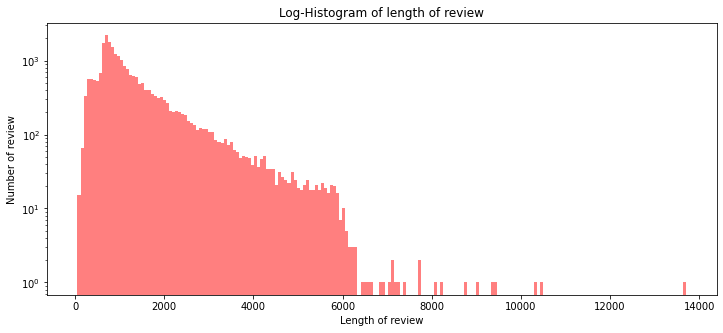

In [ ]:
#그래프에 대한 이미지 사이즈 선언
#figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

'''
###히스토그램 matplotlib.pyplot.hist
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, 
cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', 
rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

parameters

bins: 히스토그램 값들에 대한 버켓 범위
range: x축 값의 범위
alpha: 그래프 색상 투명도
color: 그래프 색상
label: 그래프에 대한 라벨


###yscale matplotlib.pyplot.yscale(value, **kwargs)
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html?highlight=yscale
'''
plt.hist(train_length, bins=200, alpha=0.5, color = 'r', label='word')
plt.yscale('log', nonposy='clip')
#그래프 제목
plt.title('Log-Histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [ ]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
#사분위에 대한 경우는 0~100 스케일로 되어 있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


***boxplot 설명**

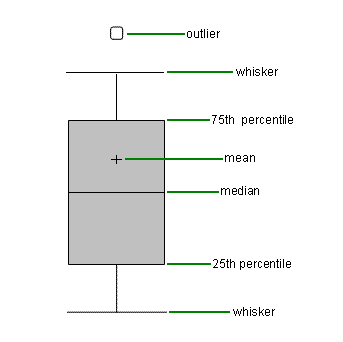

{'boxes': [<matplotlib.lines.Line2D at 0x7fbf6aece090>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbf6aed2150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf6aed76d0>],
 'means': [<matplotlib.lines.Line2D at 0x7fbf6aed7190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf6aed2c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbf6aece690>,
  <matplotlib.lines.Line2D at 0x7fbf6aecebd0>]}

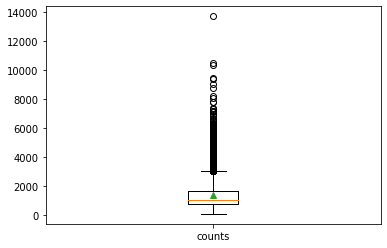

In [ ]:
plt.boxplot(train_length, labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

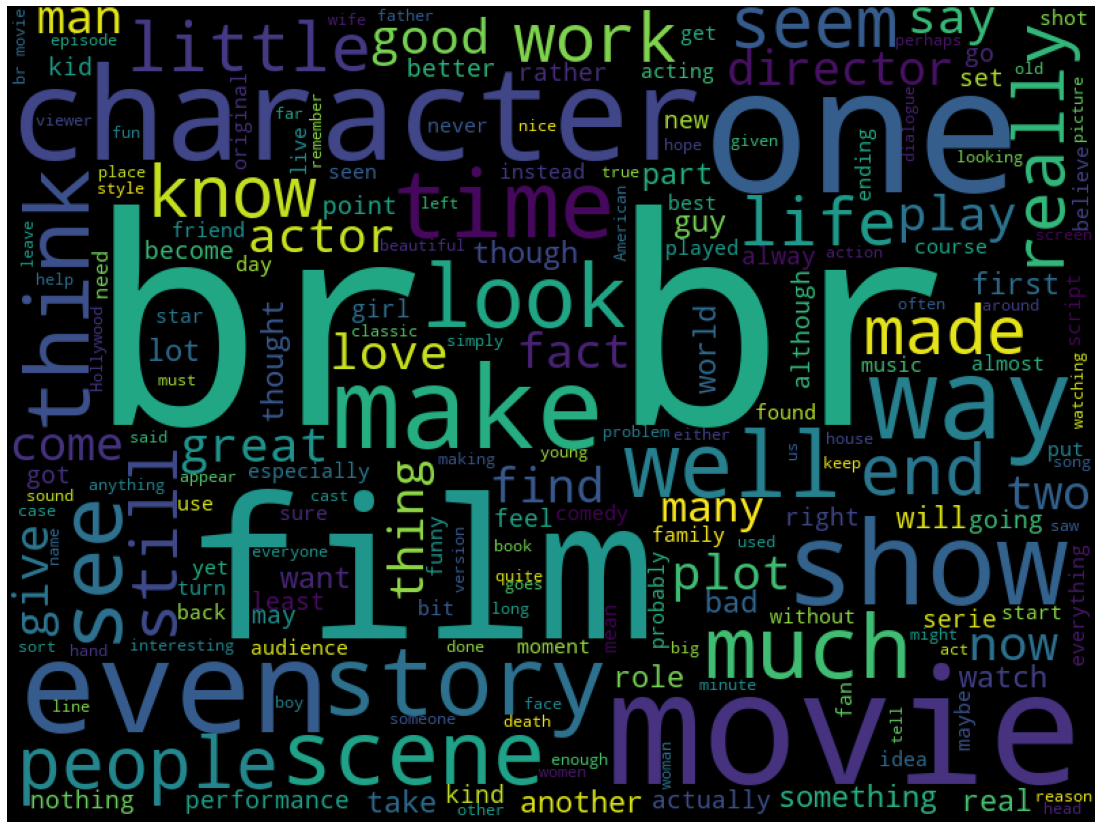

In [ ]:
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(train_data['review'])) # join function can help merge all words into one string. " " means space can be a sep between words.
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

**긍, 부정 데이터의 분포**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


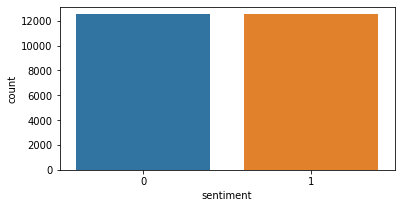

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [ ]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


**각 리뷰의 단어 개수 분포**

In [ ]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

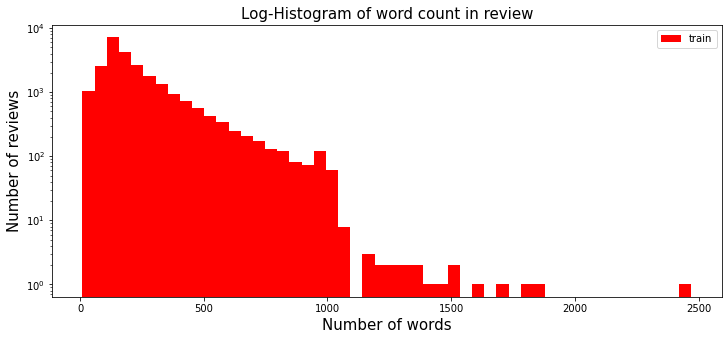

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
#그래프 제목
plt.title('Log-Histogram of word count in review', fontsize=15)

plt.yscale('log', nonposy='clip')
plt.legend()

#그래프 x축 라벨
plt.xlabel('Number of words', fontsize=15)
#그래프 y축 라벨
plt.ylabel('Number of reviews', fontsize=15)

**특수문자 및 대, 소문자 비율**

In [ ]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))    #물음표가 구두점으로 
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


**데이터 전처리**

In [ ]:
#module import
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
review = train_data['review'][0]    #리뷰 중 하나를 가져옴
review_text = BeautifulSoup(review,"html5lib").get_text()   #HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) #영어 문자를 제외한 나머지는 모두 공백으로 바꿈

In [ ]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))    #영어 불용어들의 set 만든다

review_text = review_text.lower()
words = review_text.split() #소문자 변환 후 단어마다 나눠서 단어 리스트로 만듦
words = [w for w in words if not w in stop_words]   #불용어 제거한 리스트를 만든다

In [ ]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [ ]:
clean_review = ' '.join(words)  #단어 리스트들을 다시 하나의 글로 합친다
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

**전처리 과정 함수로 만들기**

In [ ]:
def preprocessing(review, remove_stopwords = False):
    #HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()

    #영어가 아닌 특수문자들을 공백으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    #대문자들을 소문자로 바꾸고 공백단위로 텍스트 나눠서 리스트로 만들기
    words = review_text.lower().split()

    if remove_stopwords:
        #불용어들을 제거
        stops = set(stopwords.words("english"))

        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합친다.	
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

In [ ]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

# 전처리한 데이터 출력
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [ ]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [ ]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [ ]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

In [ ]:
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  74066


In [ ]:
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [ ]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [ ]:
MAX_SEQUENCE_LENGTH = 174 

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [ ]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


In [ ]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

In [ ]:
# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(TRAIN_CLEAN_DATA, index = False)


# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_CONFIGS, 'w'), ensure_ascii=False)

In [ ]:
test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(TEST_CLEAN_DATA, index = False)

**TF-IDF를 이용한 모델 구현**

**Module import**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#DATA_IN_PATH = './data_in/' 
#DATA_OUT_PATH = './data_out/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [ ]:
train_data = pd.read_csv(TRAIN_CLEAN_DATA )

In [ ]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [ ]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000) 

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

In [ ]:
X

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17862871 stored elements in Compressed Sparse Row format>

In [ ]:
features = vectorizer.get_feature_names()

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [ ]:
lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = lgs.predict(X_eval)

In [ ]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.859800


In [ ]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(TEST_CLEAN_DATA)

In [ ]:
testDataVecs = vectorizer.transform(test_data['review'])

In [ ]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [ ]:
answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
answer_dataset.to_csv('lgs_tfidf_answer.csv', index=False, quoting=3)

**Word2Vec을 이용한 모델 구현**

In [ ]:
import os 
import re
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [ ]:
train_data = pd.read_csv(TRAIN_CLEAN_DATA)

In [ ]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [ ]:
sentences = []
for review in reviews:
    sentences.append(review.split())

In [ ]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
   level=logging.INFO)

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences, workers=num_workers, \
           size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2021-07-15 06:21:42,031 : INFO : 'pattern' package not found; tag filters are not available for English
2021-07-15 06:21:42,040 : INFO : collecting all words and their counts
2021-07-15 06:21:42,041 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-15 06:21:42,290 : INFO : PROGRESS: at sentence #10000, processed 1205223 words, keeping 51374 word types
2021-07-15 06:21:42,522 : INFO : PROGRESS: at sentence #20000, processed 2396605 words, keeping 67660 word types
2021-07-15 06:21:42,645 : INFO : collected 74065 word types from a corpus of 2988089 raw words and 25000 sentences
2021-07-15 06:21:42,647 : INFO : Loading a fresh vocabulary
2021-07-15 06:21:42,692 : INFO : effective_min_count=40 retains 8160 unique words (11% of original 74065, drops 65905)
2021-07-15 06:21:42,693 : INFO : effective_min_count=40 leaves 2627273 word corpus (87% of original 2988089, drops 360816)
2021-07-15 06:21:42,719 : INFO : deleting the raw counts dictionary of 74065 items


In [ ]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index2word)

    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model[w])

    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [ ]:
def get_dataset(reviews, model, num_features):
    dataset = list()

    for s in reviews:
        dataset.append(get_features(s, model, num_features))

    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [ ]:
test_data_vecs = get_dataset(sentences, model, num_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = test_data_vecs
y = np.array(sentiments)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy: %f" % lgs.score(X_test, y_test))

Accuracy: 0.863200


In [ ]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(TEST_CLEAN_DATA)

test_review = list(test_data['review'])

In [ ]:
test_data.head(5)

,review,id
0,naturally film main themes mortality nostalgia...,"""12311_10"""
1,movie disaster within disaster film full great...,"""8348_2"""
2,movie kids saw tonight child loved one point k...,"""5828_4"""
3,afraid dark left impression several different ...,"""7186_2"""
4,accurate depiction small time mob life filmed ...,"""12128_7"""


In [ ]:
test_sentences = list()
for review in test_review:
    test_sentences.append(review.split())

In [ ]:
test_data_vecs = get_dataset(test_sentences, model, num_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
test_predicted = lgs.predict(test_data_vecs)
    
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv('lgs_w2v_answer.csv', index=False, quoting=3)

In [ ]:
model_name = "300features_40minwords_10context"
model.save(model_name)

2021-07-15 06:32:44,105 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2021-07-15 06:32:44,108 : INFO : not storing attribute vectors_norm
2021-07-15 06:32:44,109 : INFO : not storing attribute cum_table
2021-07-15 06:32:44,274 : INFO : saved 300features_40minwords_10context


**랜덤 포레스트 분류 모델**

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
TEST_SIZE = 0.2
RANDOM_SEED = 42

In [ ]:
train_data = pd.read_csv(TRAIN_CLEAN_DATA)

In [ ]:
#countvectorizer를 활용한 벡터화
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000) 

train_data_features = vectorizer.fit_transform(reviews)

In [ ]:
#학습과 검증 데이터 분리
from sklearn.model_selection import train_test_split

train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [ ]:
#모델 구현 및 학습
from sklearn.ensemble import RandomForestClassifier


# 랜덤 포레스트 분류기에  100개 의사 결정 트리를 사용한다.
forest = RandomForestClassifier(n_estimators = 100) 

# 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
forest.fit( train_input, train_label )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Accuracy: %f" % forest.score(eval_input, eval_label))  # 검증함수로 정확도 측정

Accuracy: 0.849400


In [ ]:
#검증 데이터셋으로 성능 평가
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(TEST_CLEAN_DATA)

test_reviews = list(test_data['review'])
ids = list(test_data['id'])

test_data_features = vectorizer.transform(test_reviews)

In [ ]:
#데이터 제출하기
# 위에서 만든 랜덤 포레스트 분류기를 통해 예측값을 가져온다.
result = forest.predict(test_data_features)

# 판다스 데이터 프레임을 통해 데이터를 구성해서 output에 넣는다.
output = pd.DataFrame( data={"id": ids, "sentiment": result} )

# 이제 csv파일로 만든다.
output.to_csv("Bag_of_Words_model.csv", index=False, quoting=3 )